In [283]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt

In [234]:
df1 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/dailyActivity_merged.csv')
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [273]:
minute_df = pd.melt(df1, id_vars=['Id', 'ActivityDate'], value_vars=[
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes'], var_name="MinuteIntensityType", value_name="Minutes")
print(minute_df.shape)
minute_df.head()

(3760, 4)


,Id,ActivityDate,MinuteIntensityType,Minutes
0,1503960366,4/12/2016,VeryActiveMinutes,25
1,1503960366,4/13/2016,VeryActiveMinutes,21
2,1503960366,4/14/2016,VeryActiveMinutes,30
3,1503960366,4/15/2016,VeryActiveMinutes,29
4,1503960366,4/16/2016,VeryActiveMinutes,36


In [274]:
minute_df.groupby(['MinuteIntensityType'])['Minutes'].sum()\
            .reset_index()

,MinuteIntensityType,Minutes
0,FairlyActiveMinutes,12751
1,LightlyActiveMinutes,181244
2,SedentaryMinutes,931738
3,VeryActiveMinutes,19895


**Most of the time a user is sedentary or lightly active**

In [279]:
distance_df = pd.melt(df1, id_vars=['Id', 'ActivityDate', 'Calories', 'TotalSteps'], value_vars=[
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance'], var_name="DistanceType", value_name="Distance")
print(distance_df.shape)
distance_df.head()

(4700, 6)


,Id,ActivityDate,Calories,TotalSteps,DistanceType,Distance
0,1503960366,4/12/2016,1985,13162,LoggedActivitiesDistance,0.0
1,1503960366,4/13/2016,1797,10735,LoggedActivitiesDistance,0.0
2,1503960366,4/14/2016,1776,10460,LoggedActivitiesDistance,0.0
3,1503960366,4/15/2016,1745,9762,LoggedActivitiesDistance,0.0
4,1503960366,4/16/2016,1863,12669,LoggedActivitiesDistance,0.0


In [282]:
distance_metrics = round(distance_df.groupby(['DistanceType'])['Distance'].sum(),2)\
            .reset_index()
distance_metrics.head()

,DistanceType,Distance
0,LightActiveDistance,3140.37
1,LoggedActivitiesDistance,101.68
2,ModeratelyActiveDistance,533.49
3,SedentaryActiveDistance,1.51
4,VeryActiveDistance,1412.52


C:\Users\Chen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


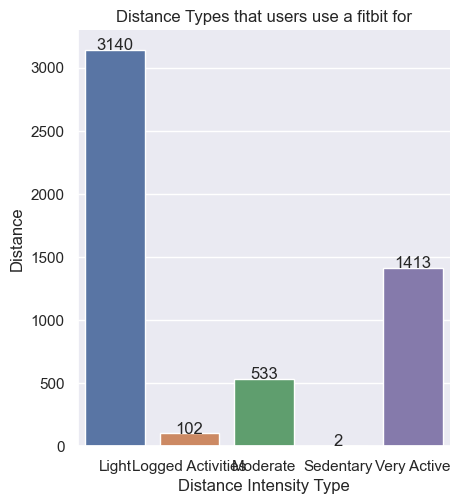

In [295]:
# ax = sns.countplot(x="rideable_type",data=df) #if variables are fewer than or equal to 5, we can create a horizontal bar chart
sns.set(rc={"figure.figsize":(18,6)})
g = sns.catplot(x='DistanceType', y='Distance', data=distance_metrics, kind='bar', errorbar=None)
g.set(xlabel="Distance Intensity Type",ylabel="Distance", xticklabels=["Light", "Logged Activities", "Moderate", "Sedentary", "Very Active"], title="Distance Types that users use a fitbit for")

ax = g.facet_axis(0, 0)

for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height, 
 s = "{:.0f}".format(height),  
 ha = "center")

**Most users are using their fitbit to track veryActiveDistance or LightActiveDistance**

**We can tell that LoggedActivitiesDistance + TrackerDistance = Total Distance and VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance + SedentaryActiveDistance = TrackerDistance**


In [243]:
df1.shape

(940, 15)

In [255]:
(df1['LoggedActivitiesDistance'] + df1['TrackerDistance'] - df1['TotalDistance'] < 0.1).sum()

908

In [254]:
(((df1['VeryActiveDistance'] + df1['ModeratelyActiveDistance']  + df1['LightActiveDistance'] + df1['SedentaryActiveDistance']) - df1['TrackerDistance']) < 0.1).sum()

926

In [236]:
df1['LoggedActivitiesDistance'].value_counts()

LoggedActivitiesDistance
0.000000    908
2.092147      9
2.253081      7
4.081692      1
4.861792      1
4.878232      1
4.912368      1
2.832326      1
4.911146      1
4.885605      1
4.924841      1
2.785175      1
1.959596      1
4.930550      1
3.285415      1
4.851307      1
4.869783      1
3.167822      1
4.942142      1
Name: count, dtype: int64

### daily values are dailyActivity_merged.csv, dailyCalories_merged.csv, dailyIntensities_merged.csv, dailySteps_merged.csv

In [235]:
df1.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [3]:
df1.shape

(940, 15)

In [4]:
df2 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/dailyCalories_merged.csv')
df2.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [38]:
df2['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [5]:
print((df2[['Id']] == df1[['Id']]).sum()==940)

Id    True
dtype: bool


In [6]:
print((df2[['Calories']] == df1[['Calories']]).sum()==940)

Calories    True
dtype: bool


In [7]:
print((df2[['ActivityDay']].values == df1[['ActivityDate']].values).sum()==940)

True


In [8]:
df2.shape

(940, 3)

DataFrame 2 is completely contained in DataFrame 1, so we don't need df2

In [9]:
df3 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/dailyIntensities_merged.csv')
df3.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [10]:
df3.shape

(940, 10)

In [11]:
df1.columns, df3.columns

(Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
        'LoggedActivitiesDistance', 'VeryActiveDistance',
        'ModeratelyActiveDistance', 'LightActiveDistance',
        'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
        'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
       dtype='object'),
 Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
        'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
        'LightActiveDistance', 'ModeratelyActiveDistance',
        'VeryActiveDistance'],
       dtype='object'))

In [12]:
for c in df3.columns:
    if c == 'ActivityDay':
        print((df3[c] == df1['ActivityDate']).sum()==940)
    else:
        print((df3[c] == df1[c]).sum()==940)
    

True
True
True
True
True
True
True
True
True
True


**Looks like all data in df3 was already contained in df1, so no need to consolidate from df3**

In [13]:
df4 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/dailySteps_merged.csv')
df4.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [14]:
for c in df4.columns:
    if c not in df1.columns and c != 'ActivityDay':
        print(c)
    

StepTotal


StepTotal is in df1 as TotalSteps, so no need to add this df

In [41]:
df1.shape, df4.shape

((940, 16), (940, 3))

In [50]:
print(((df4['Id'] == df1['Id']) & (df4['ActivityDay'] == df1['ActivityDate'])).sum()==940)

True


**It looks like ID and Date for df1 and df4 are the same and stepTotal is the same as totalSteps**

In [47]:
df4.dtypes, df1.dtypes

(Id              int64
 ActivityDay    object
 StepTotal       int64
 dtype: object,
 Id                            int64
 ActivityDate                 object
 TotalSteps                    int64
 TotalDistance               float64
 TrackerDistance             float64
 LoggedActivitiesDistance    float64
 VeryActiveDistance          float64
 ModeratelyActiveDistance    float64
 LightActiveDistance         float64
 SedentaryActiveDistance     float64
 VeryActiveMinutes             int64
 FairlyActiveMinutes           int64
 LightlyActiveMinutes          int64
 SedentaryMinutes              int64
 Calories                      int64
 StepTotal                     int64
 dtype: object)

In [51]:
# df1['StepTotal'] = df4['StepTotal']
# df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,13162
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,10735
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,10460
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,9762
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12669


In [175]:
df5 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/heartrate_seconds_merged.csv')
df5.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [177]:
df5["ActivityDate"] = df5["Time"].apply(lambda x: x.split(" ")[0])

# x.strftime("%m/%d/%Y").lstrip("0")

In [178]:
df5.head()

,Id,Time,Value,ActivityDate
0,2022484408,4/12/2016 7:21:00 AM,97,4/12/2016
1,2022484408,4/12/2016 7:21:05 AM,102,4/12/2016
2,2022484408,4/12/2016 7:21:10 AM,105,4/12/2016
3,2022484408,4/12/2016 7:21:20 AM,103,4/12/2016
4,2022484408,4/12/2016 7:21:25 AM,101,4/12/2016


In [182]:
avg_daily_hr_df = df5.groupby(["Id", "ActivityDate"])['Value'].mean()\
.reset_index()\
.rename(columns={"Value": "Average Daily HeartRate (bpm)"})

avg_daily_hr_df
# df5["Avg Heart Rate (bpm)"] = a["Value"]
# df1["Avg Heart Rate (bpm)"] = a["Value"]
# df1.head()

,Id,ActivityDate,Average Daily HeartRate (bpm)
0,2022484408,4/12/2016,75.804177
1,2022484408,4/13/2016,80.337584
2,2022484408,4/14/2016,72.628597
3,2022484408,4/15/2016,80.437382
4,2022484408,4/16/2016,75.960547
...,...,...,...
329,8877689391,5/5/2016,72.851280
330,8877689391,5/6/2016,92.840120
331,8877689391,5/7/2016,100.997241
332,8877689391,5/8/2016,72.550523


In [163]:
df1.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'StepTotal'],
      dtype='object')

**We do not have heartrate data in df1**

In [52]:
df1.Id.value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [17]:
df5.Id.value_counts()

Id
4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: count, dtype: int64

In [55]:
df1_Id_set = set(df1["Id"].values)
df1_Id_set

{1503960366,
 1624580081,
 1644430081,
 1844505072,
 1927972279,
 2022484408,
 2026352035,
 2320127002,
 2347167796,
 2873212765,
 3372868164,
 3977333714,
 4020332650,
 4057192912,
 4319703577,
 4388161847,
 4445114986,
 4558609924,
 4702921684,
 5553957443,
 5577150313,
 6117666160,
 6290855005,
 6775888955,
 6962181067,
 7007744171,
 7086361926,
 8053475328,
 8253242879,
 8378563200,
 8583815059,
 8792009665,
 8877689391}

In [61]:
df5_Id_set = set(df5["Id"].values)
df5_Id_set, len(df5_Id_set)

({2022484408,
  2026352035,
  2347167796,
  4020332650,
  4388161847,
  4558609924,
  5553957443,
  5577150313,
  6117666160,
  6775888955,
  6962181067,
  7007744171,
  8792009665,
  8877689391},
 14)

In [57]:
df5_Id_set - df1_Id_set

set()

In [62]:
df1_Id_set - df5_Id_set, len(df1_Id_set - df5_Id_set)

({1503960366,
  1624580081,
  1644430081,
  1844505072,
  1927972279,
  2320127002,
  2873212765,
  3372868164,
  3977333714,
  4057192912,
  4319703577,
  4445114986,
  4702921684,
  6290855005,
  7086361926,
  8053475328,
  8253242879,
  8378563200,
  8583815059},
 19)

**Every Id in df5 can be found in df1, but many Ids in df1 not in df5. We are not able to combine the table df5 into df1 easily**

In [54]:
df5.shape, df1.shape

((2483658, 6), (940, 16))

In [24]:
for c in df5.columns:
    if c not in df1.columns and c != 'ActivityDay':
        print(c)

Time
Value
Year
Month
Day


In [69]:
df6 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/hourlyCalories_merged.csv')
df6.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [70]:
df6.shape

(22099, 3)

In [75]:
df6_Id_set = set(df6.Id.values)
(df6_Id_set == df1_Id_set)

True

**It's the same set of Id values, but df6 cannot be added directly into df1. This is because df6 is in hours but df1 in days**

In [77]:
df6.ActivityHour=pd.DatetimeIndex(df6.ActivityHour)
df6.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [78]:
df6['Year']=pd.DatetimeIndex(df6.ActivityHour).year
df6['Month']=pd.DatetimeIndex(df6.ActivityHour).month
df6['Day']=pd.DatetimeIndex(df6.ActivityHour).day
df6.head()

,Id,ActivityHour,Calories,Year,Month,Day
0,1503960366,2016-04-12 00:00:00,81,2016,4,12
1,1503960366,2016-04-12 01:00:00,61,2016,4,12
2,1503960366,2016-04-12 02:00:00,59,2016,4,12
3,1503960366,2016-04-12 03:00:00,47,2016,4,12
4,1503960366,2016-04-12 04:00:00,48,2016,4,12


In [81]:
a = df6.groupby([df6.Id, df6.Year, df6.Month, df6.Day])['Calories'].sum()\
    .reset_index()
a

,Id,Year,Month,Day,Calories
0,1503960366,2016,4,12,1988
1,1503960366,2016,4,13,1798
2,1503960366,2016,4,14,1776
3,1503960366,2016,4,15,1745
4,1503960366,2016,4,16,1866
...,...,...,...,...,...
929,8877689391,2016,5,8,2840
930,8877689391,2016,5,9,3695
931,8877689391,2016,5,10,2826
932,8877689391,2016,5,11,3827


In [84]:
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,13162
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,10735
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,10460
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,9762
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12669


Likely data for each day is the same. Calories are very close and can have rounding error, so the aggregate calories by day are already contained in the data

In [82]:
df1.shape, df1.columns

((940, 16),
 Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
        'LoggedActivitiesDistance', 'VeryActiveDistance',
        'ModeratelyActiveDistance', 'LightActiveDistance',
        'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
        'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'StepTotal'],
       dtype='object'))

In [87]:
df7 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/hourlyIntensities_merged.csv')
df7.head(25)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000
5,1503960366,4/12/2016 5:00:00 AM,0,0.000000
6,1503960366,4/12/2016 6:00:00 AM,0,0.000000
7,1503960366,4/12/2016 7:00:00 AM,0,0.000000
8,1503960366,4/12/2016 8:00:00 AM,13,0.216667
9,1503960366,4/12/2016 9:00:00 AM,30,0.500000


In [88]:
df7.shape

(22099, 4)

In [89]:
df7_Id_set = set(df7.Id.values)
(df7_Id_set == df1_Id_set)

True

In [90]:
df7['Year']=pd.DatetimeIndex(df7.ActivityHour).year
df7['Month']=pd.DatetimeIndex(df7.ActivityHour).month
df7['Day']=pd.DatetimeIndex(df7.ActivityHour).day
df7.head()

a = df7.groupby([df7.Year, df7.Month, df7.Day, df7.Id])['TotalIntensity'].sum()\
    .reset_index()
a

,Year,Month,Day,Id,TotalIntensity
0,2016,4,12,1503960366,429
1,2016,4,12,1624580081,146
2,2016,4,12,1644430081,364
3,2016,4,12,1844505072,339
4,2016,4,12,1927972279,55
...,...,...,...,...,...
929,2016,5,12,6962181067,121
930,2016,5,12,7086361926,32
931,2016,5,12,8053475328,130
932,2016,5,12,8378563200,127


**We want to get the total intensity by day and average intensity by day, and then add them to df1 corresponding to userId and day**

In [91]:
df8 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/hourlySteps_merged.csv')
df8.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [92]:
def compareIds(dfA, dfB):
    dfA_Id_set = set(dfA.Id.values)
    dfB_Id_set = set(dfB.Id.values)
    print(dfA_Id_set == dfB_Id_set)

In [93]:
compareIds(df1, df8)

True


In [95]:
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,13162
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,10735
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,10460
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,9762
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12669


**Maybe we should have 2 tables, 1 table with all hourly data and 1 table with all daily data**

In [97]:
df9 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteCaloriesNarrow_merged.csv')
df9

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.78650
1,1503960366,4/12/2016 12:01:00 AM,0.78650
2,1503960366,4/12/2016 12:02:00 AM,0.78650
3,1503960366,4/12/2016 12:03:00 AM,0.78650
4,1503960366,4/12/2016 12:04:00 AM,0.78650
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,1.33353
1325576,8877689391,5/12/2016 1:56:00 PM,1.33353
1325577,8877689391,5/12/2016 1:57:00 PM,1.33353
1325578,8877689391,5/12/2016 1:58:00 PM,1.33353


In [98]:
compareIds(df9, df1)

True


**Should we add another table. 1 daily, 1 hourly, and 1 by minute**

In [102]:
df10 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteCaloriesWide_merged.csv')
df10.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


In [105]:
col = ['Calories00', 'Calories01', 'Calories02',
       'Calories03', 'Calories04', 'Calories05', 'Calories06', 'Calories07',
       'Calories08', 'Calories09', 'Calories10', 'Calories11', 'Calories12',
       'Calories13', 'Calories14', 'Calories15', 'Calories16', 'Calories17',
       'Calories18', 'Calories19', 'Calories20', 'Calories21', 'Calories22',
       'Calories23', 'Calories24', 'Calories25', 'Calories26', 'Calories27',
       'Calories28', 'Calories29', 'Calories30', 'Calories31', 'Calories32',
       'Calories33', 'Calories34', 'Calories35', 'Calories36', 'Calories37',
       'Calories38', 'Calories39', 'Calories40', 'Calories41', 'Calories42',
       'Calories43', 'Calories44', 'Calories45', 'Calories46', 'Calories47',
       'Calories48', 'Calories49', 'Calories50', 'Calories51', 'Calories52',
       'Calories53', 'Calories54', 'Calories55', 'Calories56', 'Calories57',
       'Calories58', 'Calories59']

In [107]:
df10_longform = pd.melt(df10, id_vars=['Id', 'ActivityHour'], value_vars=col, value_name='Calories', var_name='Minutes')
df10_longform.shape

(1298700, 4)

In [109]:
df10_longform.head(50)

,Id,ActivityHour,Minutes,Calories
0,1503960366,4/13/2016 12:00:00 AM,Calories00,1.8876
1,1503960366,4/13/2016 1:00:00 AM,Calories00,0.7865
2,1503960366,4/13/2016 2:00:00 AM,Calories00,0.7865
3,1503960366,4/13/2016 3:00:00 AM,Calories00,0.7865
4,1503960366,4/13/2016 4:00:00 AM,Calories00,0.7865
5,1503960366,4/13/2016 5:00:00 AM,Calories00,0.7865
6,1503960366,4/13/2016 6:00:00 AM,Calories00,0.7865
7,1503960366,4/13/2016 7:00:00 AM,Calories00,0.7865
8,1503960366,4/13/2016 8:00:00 AM,Calories00,0.9438
9,1503960366,4/13/2016 9:00:00 AM,Calories00,0.9438


In [103]:
df10.columns

Index(['Id', 'ActivityHour', 'Calories00', 'Calories01', 'Calories02',
       'Calories03', 'Calories04', 'Calories05', 'Calories06', 'Calories07',
       'Calories08', 'Calories09', 'Calories10', 'Calories11', 'Calories12',
       'Calories13', 'Calories14', 'Calories15', 'Calories16', 'Calories17',
       'Calories18', 'Calories19', 'Calories20', 'Calories21', 'Calories22',
       'Calories23', 'Calories24', 'Calories25', 'Calories26', 'Calories27',
       'Calories28', 'Calories29', 'Calories30', 'Calories31', 'Calories32',
       'Calories33', 'Calories34', 'Calories35', 'Calories36', 'Calories37',
       'Calories38', 'Calories39', 'Calories40', 'Calories41', 'Calories42',
       'Calories43', 'Calories44', 'Calories45', 'Calories46', 'Calories47',
       'Calories48', 'Calories49', 'Calories50', 'Calories51', 'Calories52',
       'Calories53', 'Calories54', 'Calories55', 'Calories56', 'Calories57',
       'Calories58', 'Calories59'],
      dtype='object')

In [110]:
df11 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteIntensitiesNarrow_merged.csv')
df11.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [111]:
compareIds(df11, df1)

True


In [112]:
df12 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteIntensitiesWide_merged.csv')
df12.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df13 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteMETsNarrow_merged.csv')
df13

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11
1325576,8877689391,5/12/2016 1:56:00 PM,11
1325577,8877689391,5/12/2016 1:57:00 PM,11
1325578,8877689391,5/12/2016 1:58:00 PM,11


In [114]:
compareIds(df13, df1)

True


In [115]:
df14 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteSleep_merged.csv')
df14.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [116]:
compareIds(df14, df1)

False


In [117]:
df14_Id_set = set(df14.Id.values)
df1_Id_set - df14_Id_set

{1624580081,
 2022484408,
 2873212765,
 3372868164,
 4057192912,
 6290855005,
 8253242879,
 8583815059,
 8877689391}

In [118]:
df14_Id_set - df1_Id_set

set()

In [119]:
df1.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'StepTotal'],
      dtype='object')

**All Ids in df14 are in df1**

In [120]:
df15 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteStepsNarrow_merged.csv')
df15.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [121]:
compareIds(df15, df1)

True


In [122]:
df16 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/minuteStepsWide_merged.csv')
df16.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
compareIds(df16, df1)

True


**df15 and df16 are contained in df1, in that df1 has total steps per day. These contain steps per minute. We do not need to merge df15 and df16 into df1**

In [124]:
df17 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/sleepDay_merged.csv')
df17.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [140]:
df17.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [141]:
s = "4/12/2016 12:00:00 AM"

In [143]:
s.split(" ")[0]

'4/12/2016'

In [149]:
df17["ActivityDate"] = df17["SleepDay"].apply(lambda x: x.split(" ")[0])

In [150]:
df17.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,4/13/2016
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,4/15/2016
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,4/16/2016
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,4/17/2016


In [136]:
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,13162
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,10735
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,10460
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,9762
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12669


In [134]:
df17.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [135]:
df1.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'StepTotal'],
      dtype='object')

In [133]:
df17.shape, df1.shape

((413, 5), (940, 16))

In [126]:
compareIds(df17, df1)

False


In [127]:
set(df17.Id.values) - df1_Id_set

set()

In [128]:
df1_Id_set - set(df17.Id.values)

{1624580081,
 2022484408,
 2873212765,
 3372868164,
 4057192912,
 6290855005,
 8253242879,
 8583815059,
 8877689391}

In [152]:
df1_df17_merge = df1.merge(df17, how = 'outer', on=['Id', 'ActivityDate'])

df1_df17_merge.drop("SleepDay", axis=1, inplace=True)
df1_df17_merge

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,13162,1.0,327.0,346.0
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,10735,2.0,384.0,407.0
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,10460,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,9762,1.0,412.0,442.0
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,12669,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,10686,NaN,NaN,NaN
939,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,20226,NaN,NaN,NaN
940,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,10733,NaN,NaN,NaN
941,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,21420,NaN,NaN,NaN


**df1 contains some more Ids. df17 has daily sleep records which can be merged in df1, and add these as NA**

In [125]:
df18 = pd.read_csv('C:/Users/Chen/Desktop/DS/Case Study 2/fitbase data/weightLogInfo_merged.csv')
df18.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [157]:
df18["ActivityDate"] = df18["Date"].apply(lambda x: x.split(" ")[0])
df18.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActivityDate
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000,5/2/2016
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000,5/3/2016
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000,4/13/2016
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000,4/21/2016
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000,5/12/2016


In [129]:
compareIds(df18, df1)

False


In [153]:
set(df18.Id.values) - df1_Id_set

set()

In [154]:
df1_Id_set - set(df18.Id.values)

{1624580081,
 1644430081,
 1844505072,
 2022484408,
 2026352035,
 2320127002,
 2347167796,
 3372868164,
 3977333714,
 4020332650,
 4057192912,
 4388161847,
 4445114986,
 4702921684,
 5553957443,
 6117666160,
 6290855005,
 6775888955,
 7007744171,
 7086361926,
 8053475328,
 8253242879,
 8378563200,
 8583815059,
 8792009665}

In [155]:
df18.shape

(67, 8)

**df18 also in days, can possibly be added to df1**

In [160]:
df1_df17_df18_merge = df1_df17_merge.merge(df18, how = 'outer', on=['Id', 'ActivityDate'])
df1_df17_df18_merge.drop("Date", axis=1,inplace=True)
df1_df17_df18_merge.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13162,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,10735,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,10460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,9762,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,12669,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN


**Merged in df17 and df18 into df1. df1 now contains d2,df3,df4,df17, and df18**

In [161]:
df1_df17_df18_merge.to_csv('ActivityData_Day.csv',index=False)

In [192]:
for col in df1_df17_df18_merge.columns:
    print(col)

Id
ActivityDate
TotalSteps
TotalDistance
TrackerDistance
LoggedActivitiesDistance
VeryActiveDistance
ModeratelyActiveDistance
LightActiveDistance
SedentaryActiveDistance
VeryActiveMinutes
FairlyActiveMinutes
LightlyActiveMinutes
SedentaryMinutes
Calories
TotalSleepRecords
TotalMinutesAsleep
TotalTimeInBed
WeightKg
WeightPounds
Fat
BMI
IsManualReport
LogId


In [185]:
df1_df17_df18_merge.drop(columns={"StepTotal"}, axis=1, inplace=True)
df1_df17_df18_merge.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df1_df17_df18_merge

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,1985,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,1797,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,1745,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,1863,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,2847,NaN,NaN,NaN,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
939,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,3710,NaN,NaN,NaN,85.500000,188.495234,NaN,25.610001,False,1.462776e+12
940,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,3832,NaN,NaN,NaN,85.400002,188.274775,NaN,25.559999,False,1.462950e+12


In [191]:
id_vars = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
          'TrackerDistance',
            'LoggedActivitiesDistance',
            'VeryActiveMinutes',
            'FairlyActiveMinutes',
            'LightlyActiveMinutes',
            'SedentaryMinutes',
            'Calories',
            'TotalSleepRecords',
            'TotalMinutesAsleep',
            'TotalTimeInBed',
            'WeightKg',
            'WeightPounds',
            'Fat',
            'BMI',
            'IsManualReport',
            'LogId']

value_vars = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']

In [197]:
longform_merged = df1_df17_df18_merge.melt(id_vars=id_vars, value_vars=value_vars, var_name="ActiveDistanceType", value_name="Distance_value")
longform_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,...,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActiveDistanceType,Distance_value
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,25,13,328,728,...,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,1.88
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,21,19,217,776,...,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,1.57
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,30,11,181,1218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,2.44
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,29,34,209,726,...,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,2.14
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,36,10,221,773,...,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,2.71


In [198]:
longform_merged.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg',
       'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId',
       'ActiveDistanceType', 'Distance_value'],
      dtype='object')

In [199]:
id_vars=['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg',
       'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId',
       'ActiveDistanceType', 'Distance_value']

value_vars = ['VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']

In [202]:
longform_merged2 = longform_merged.melt(id_vars=id_vars, value_vars=value_vars, var_name="ActiveMinuteType", value_name="ActiveMinuteValue")
longform_merged2.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActiveDistanceType,Distance_value,ActiveMinuteType,ActiveMinuteValue
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1985,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,1.88,VeryActiveMinutes,25
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1797,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,1.57,VeryActiveMinutes,21
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,2.44,VeryActiveMinutes,30
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,1745,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,2.14,VeryActiveMinutes,29
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,1863,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,2.71,VeryActiveMinutes,36
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,1728,1.0,700.0,712.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,3.19,VeryActiveMinutes,38
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,3.25,VeryActiveMinutes,42
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,2035,1.0,304.0,320.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,3.53,VeryActiveMinutes,50
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1786,1.0,360.0,377.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,1.96,VeryActiveMinutes,28
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1775,1.0,325.0,364.0,NaN,NaN,NaN,NaN,NaN,NaN,VeryActiveDistance,1.34,VeryActiveMinutes,19


In [204]:
import datetime as dt

### Sanity Checks

Start by checking for missing values

In [207]:
longform_merged2.isnull().sum()

Id                              0
ActivityDate                    0
TotalSteps                      0
TotalDistance                   0
TrackerDistance                 0
LoggedActivitiesDistance        0
Calories                        0
TotalSleepRecords            8480
TotalMinutesAsleep           8480
TotalTimeInBed               8480
WeightKg                    14016
WeightPounds                14016
Fat                         15056
BMI                         14016
IsManualReport              14016
LogId                       14016
ActiveDistanceType              0
Distance_value                  0
ActiveMinuteType                0
ActiveMinuteValue               0
dtype: int64

A lot of missing values for the middle columns

Percentage missing values for each columns

In [211]:
longform_merged2.isnull().sum() / len(longform_merged2) * 100

Id                           0.000000
ActivityDate                 0.000000
TotalSteps                   0.000000
TotalDistance                0.000000
TrackerDistance              0.000000
LoggedActivitiesDistance     0.000000
Calories                     0.000000
TotalSleepRecords           56.203606
TotalMinutesAsleep          56.203606
TotalTimeInBed              56.203606
WeightKg                    92.895016
WeightPounds                92.895016
Fat                         99.787911
BMI                         92.895016
IsManualReport              92.895016
LogId                       92.895016
ActiveDistanceType           0.000000
Distance_value               0.000000
ActiveMinuteType             0.000000
ActiveMinuteValue            0.000000
dtype: float64

In [212]:
longform_merged2.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'Calories', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'WeightPounds',
       'Fat', 'BMI', 'IsManualReport', 'LogId', 'ActiveDistanceType',
       'Distance_value', 'ActiveMinuteType', 'ActiveMinuteValue'],
      dtype='object')

In [215]:
longform_data = longform_merged2[['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'Calories','ActiveDistanceType',
       'Distance_value', 'ActiveMinuteType', 'ActiveMinuteValue']]
longform_data.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,Calories,ActiveDistanceType,Distance_value,ActiveMinuteType,ActiveMinuteValue
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1985,VeryActiveDistance,1.88,VeryActiveMinutes,25
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1797,VeryActiveDistance,1.57,VeryActiveMinutes,21
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,1776,VeryActiveDistance,2.44,VeryActiveMinutes,30
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,1745,VeryActiveDistance,2.14,VeryActiveMinutes,29
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,1863,VeryActiveDistance,2.71,VeryActiveMinutes,36
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,1728,VeryActiveDistance,3.19,VeryActiveMinutes,38
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,1921,VeryActiveDistance,3.25,VeryActiveMinutes,42
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,2035,VeryActiveDistance,3.53,VeryActiveMinutes,50
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1786,VeryActiveDistance,1.96,VeryActiveMinutes,28
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1775,VeryActiveDistance,1.34,VeryActiveMinutes,19


In [217]:
longform_data['ActivityDate'].min(), longform_data['ActivityDate'].max()

('4/12/2016', '5/9/2016')

In [218]:
longform_data.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
Calories                      int64
ActiveDistanceType           object
Distance_value              float64
ActiveMinuteType             object
ActiveMinuteValue             int64
dtype: object

In [227]:
longform_data.loc[:,'ActivityDate'] = pd.to_datetime(longform_data['ActivityDate'])

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,Calories,ActiveDistanceType,Distance_value,ActiveMinuteType,ActiveMinuteValue,ActivityDate_1
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1985,VeryActiveDistance,1.88,VeryActiveMinutes,25,2016-04-12
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1797,VeryActiveDistance,1.57,VeryActiveMinutes,21,2016-04-13
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,1776,VeryActiveDistance,2.44,VeryActiveMinutes,30,2016-04-14
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,1745,VeryActiveDistance,2.14,VeryActiveMinutes,29,2016-04-15
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,1863,VeryActiveDistance,2.71,VeryActiveMinutes,36,2016-04-16


In [229]:
longform_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,Calories,ActiveDistanceType,Distance_value,ActiveMinuteType,ActiveMinuteValue
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1985,VeryActiveDistance,1.88,VeryActiveMinutes,25
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1797,VeryActiveDistance,1.57,VeryActiveMinutes,21
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,1776,VeryActiveDistance,2.44,VeryActiveMinutes,30
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,1745,VeryActiveDistance,2.14,VeryActiveMinutes,29
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,1863,VeryActiveDistance,2.71,VeryActiveMinutes,36


In [231]:
longform_data.groupby(['Id', 'ActiveDistanceType'])['TotalDistance'].count()\
    .reset_index()

,Id,ActiveDistanceType,TotalDistance
0,1503960366,LightActiveDistance,124
1,1503960366,ModeratelyActiveDistance,124
2,1503960366,SedentaryActiveDistance,124
3,1503960366,VeryActiveDistance,124
4,1624580081,LightActiveDistance,124
...,...,...,...
127,8792009665,VeryActiveDistance,116
128,8877689391,LightActiveDistance,124
129,8877689391,ModeratelyActiveDistance,124
130,8877689391,SedentaryActiveDistance,124
